In [964]:
# Import required packages for this project.
from pathlib import Path

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import anderson
from scipy.stats import ttest_ind
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

from sklearn.compose import ColumnTransformer


%matplotlib inline

In [965]:
# Established path to access data for this project.
DATA = Path("D:\Masters Of Data Science\ANA 680\Module 4\Final Project")

In [966]:
# Load the required data for this project.
TCC_df = pd.read_csv(DATA / 'Telco-Customer-Churn.csv', header=0)

# View some initial records.
TCC_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [967]:
# Generate data frame dimensions.
TCC_df.shape

(7043, 21)

In [968]:
# Generate variable data types.
TCC_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [969]:
# Generate number of missing values.
TCC_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [970]:
TCC_df.describe().map('{:,.3f}'.format)

,SeniorCitizen,tenure,MonthlyCharges
count,"7,043.000","7,043.000","7,043.000"
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


Exploratory Data Analysis For Relevant Dataset Variables

In [971]:
# Evaluate the 'customerID' numeric ID variable uniqueness value count.
TCC_df['customerID'].nunique()

7043

In [972]:
# Evaluate the 'Churn' categorical target variable value counts.
TCC_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

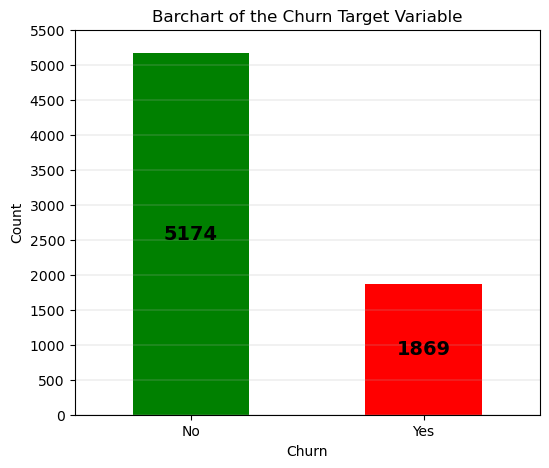

In [973]:
# Barchart for the 'Churn' categorical target variable.
dfg = TCC_df['Churn'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Churn Target Variable', ylabel='Count', xlabel='Churn', color= ['green', 'red'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
plt.yticks(np.arange(0,5501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

In [974]:
# Evaluate the 'gender' categorical variable value counts.
TCC_df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

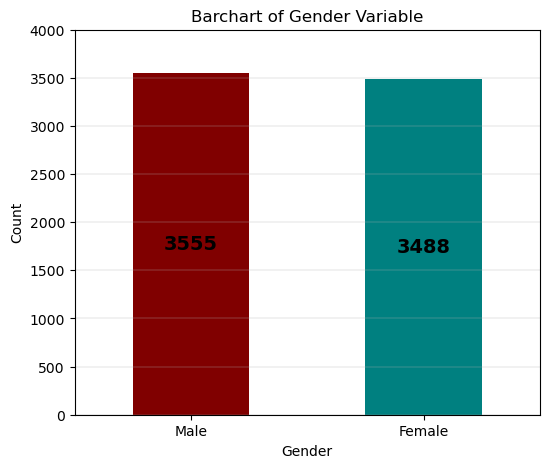

In [975]:
# Barchart for the 'gender' categorical variable.
dfg = TCC_df['gender'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Gender Variable', ylabel='Count', xlabel='Gender', color= ['maroon', 'teal'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,4001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

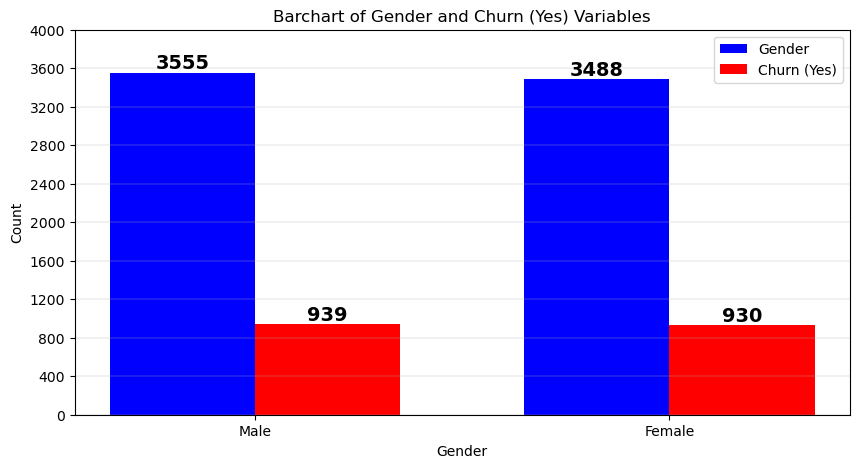

In [976]:
# Barchart for 'gender' categorical variable with 'Churn' (Yes).
# Get counts for 'gender'.
gender_counts = TCC_df['gender'].value_counts()

# Get counts of 'Churn' (Yes) for each 'gender' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['gender'].value_counts()

# Set up the bar chart.
test_values = ['Male', 'Female'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'gender' bars (blue).
ax.bar(x - width/2, gender_counts, width, label='Gender', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=14, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Gender and Churn (Yes) Variables')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 4001, step=400))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [977]:
# Evaluate the 'SeniorCitizen' binary categorical variable value counts.
TCC_df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

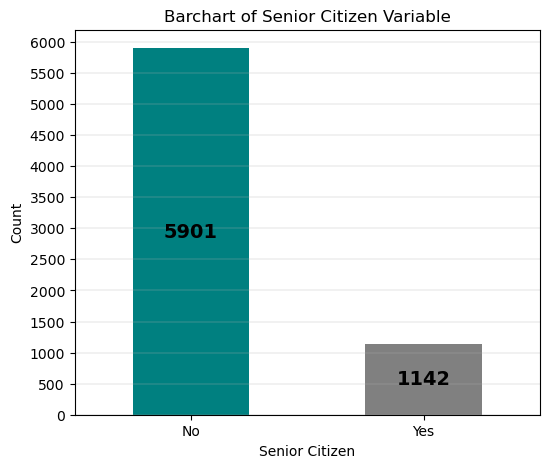

In [978]:
# Barchart for the 'SeniorCitizen' categorical variable (0: No and 1: Yes).
dfg = TCC_df['SeniorCitizen'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Senior Citizen Variable', ylabel='Count', xlabel='Senior Citizen', color= ['teal', 'gray'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.xticks([0,1], ['No','Yes'])
plt.yticks(np.arange(0,6001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

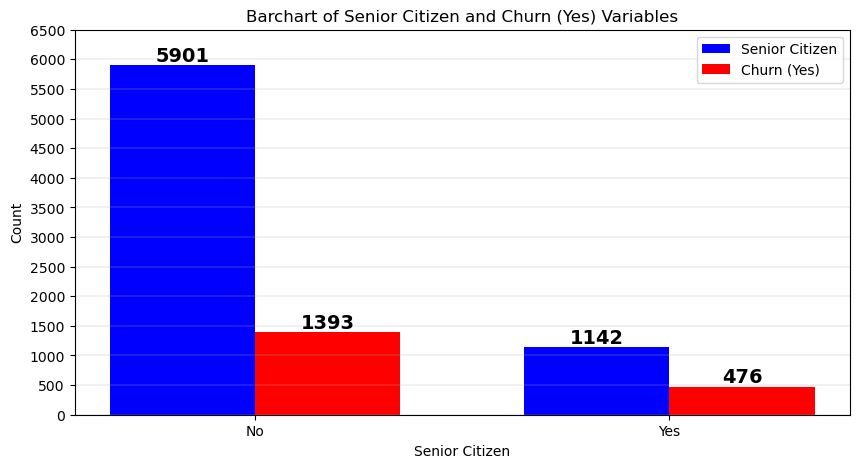

In [979]:
# Barchart for 'SeniorCitizen' categorical variable with 'Churn' (Yes).
# Get counts for 'SeniorCitizen'.
elder_counts = TCC_df['SeniorCitizen'].value_counts()

# Get counts of 'Churn' (Yes) for each 'SeniorCitizen' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()

# Set up the bar chart.
test_values = [0, 1] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'SeniorCitizen' bars (blue).
ax.bar(x - width/2, elder_counts, width, label='Senior Citizen', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=14, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Senior Citizen and Churn (Yes) Variables')
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.xticks([0,1], ['No','Yes'])
plt.yticks(np.arange(0, 6501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [980]:
# Evaluate the 'Partner' categorical variable value counts.
TCC_df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

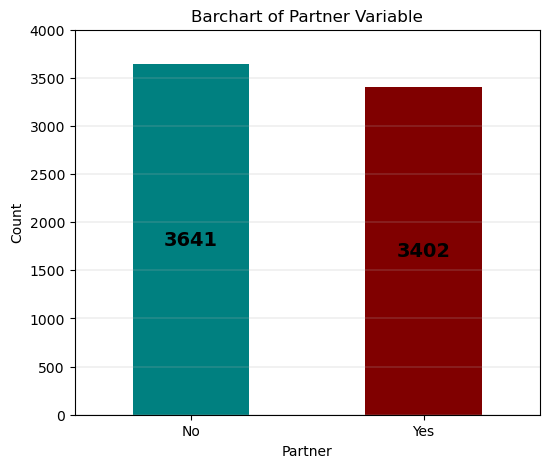

In [981]:
# Barchart for the 'Partner' categorical variable.
dfg = TCC_df['Partner'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Partner Variable', ylabel='Count', xlabel='Partner', color= ['teal', 'maroon'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,4001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

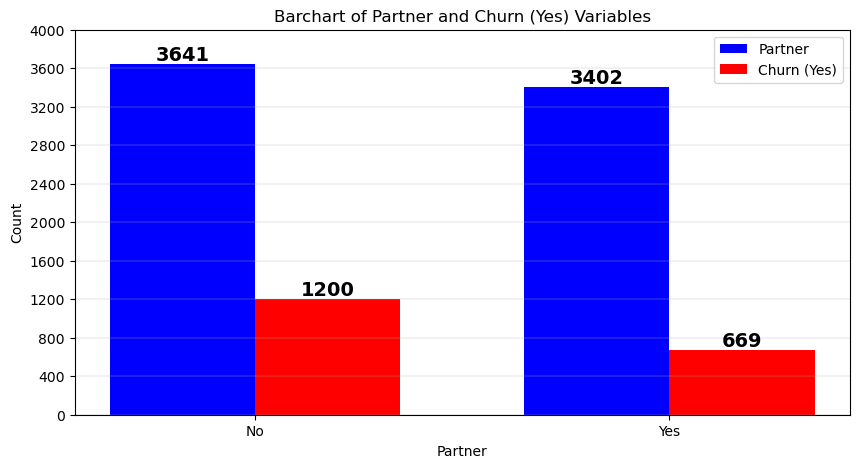

In [982]:
# Barchart for 'Partner' categorical variable with 'Churn' (Yes).
# Get counts for 'Partner'.
partner_counts = TCC_df['Partner'].value_counts()

# Get counts of 'Churn' (Yes) for each 'Partner' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['Partner'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'Partner' bars (blue).
ax.bar(x - width/2, partner_counts, width, label='Partner', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=14, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Partner and Churn (Yes) Variables')
ax.set_xlabel('Partner')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 4001, step=400))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [983]:
# Evaluate the 'Dependents' categorical variable value counts.
TCC_df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

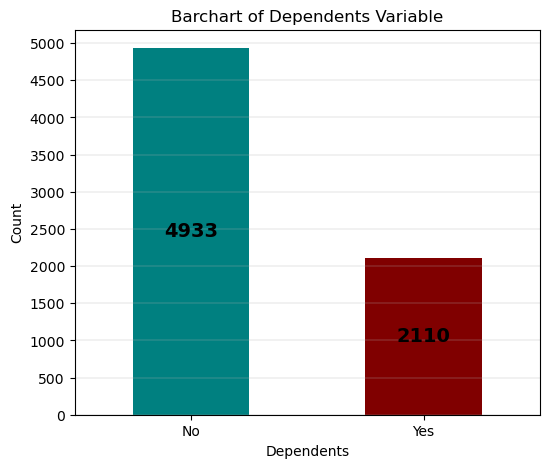

In [984]:
# Barchart for the 'Dependents' categorical variable.
dfg = TCC_df['Dependents'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Dependents Variable', ylabel='Count', xlabel='Dependents', color= ['teal', 'maroon'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,5001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

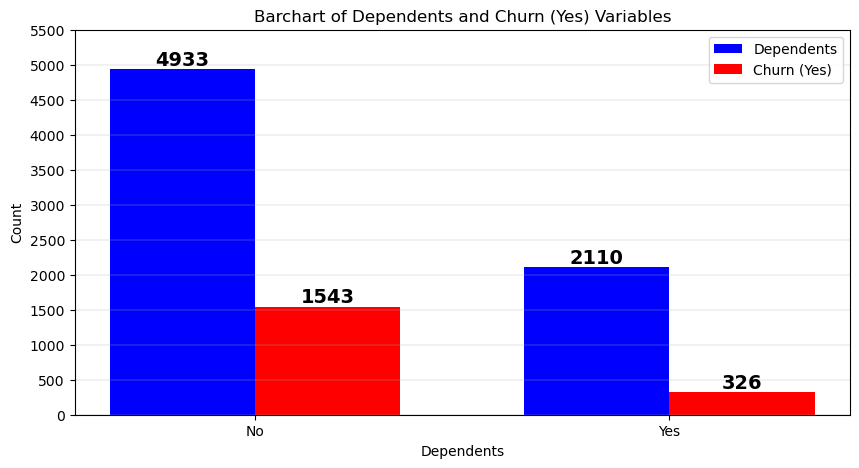

In [985]:
# Barchart for 'Dependents' categorical variable with 'Churn' (Yes).
# Get counts for 'Dependents'.
depend_counts = TCC_df['Dependents'].value_counts()

# Get counts of 'Churn' (Yes) for each 'Dependents' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['Dependents'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'Dependents' bars (blue).
ax.bar(x - width/2, depend_counts, width, label='Dependents', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=14, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Dependents and Churn (Yes) Variables')
ax.set_xlabel('Dependents')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 5501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

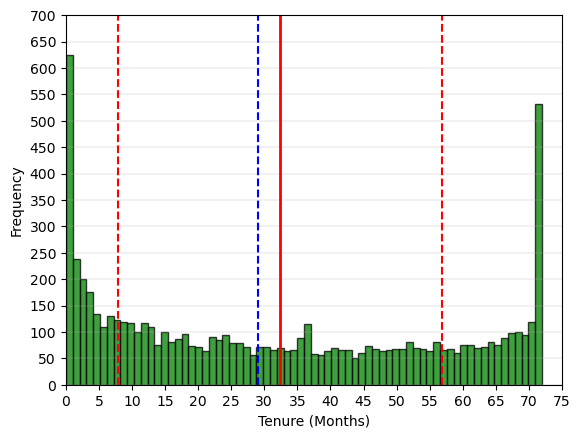

In [986]:
# Histogram for the 'tenure' continuous variable.
plt.hist(TCC_df['tenure'], bins = 70, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.xlim(0, 75)
plt.xticks(np.arange(0,76,step=5))
plt.yticks(np.arange(0,701,step=50))

mean_value = TCC_df['tenure'].mean()
median_value = TCC_df['tenure'].median()
std_value = TCC_df['tenure'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

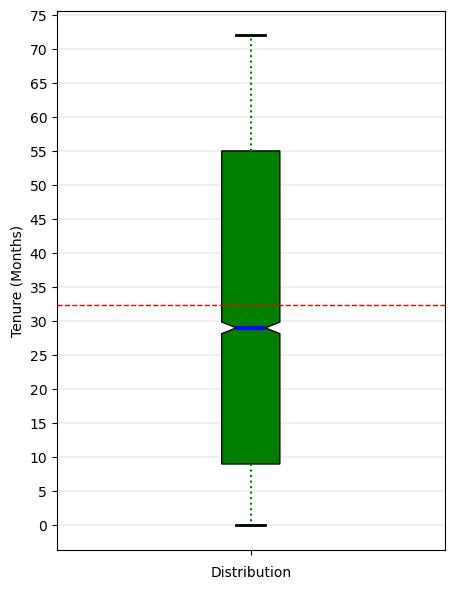

In [987]:
# Boxplot for the 'tenure' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(TCC_df['tenure'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Tenure (Months)')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,76,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [988]:
# 'tenure' Anderson-Darling Normality Test
result = anderson(TCC_df['tenure'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 203.235
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


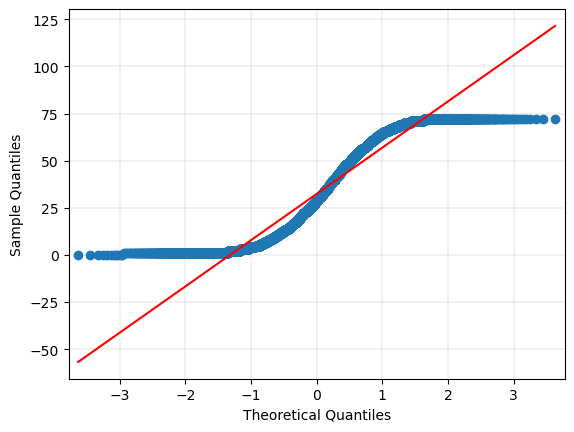

In [989]:
# 'tenure' QQ plot
qqplot(TCC_df['tenure'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [990]:
# 'tenure' Skewness & Kurtosis
print(f'Skewness: {skew(TCC_df['tenure']).round(3)}')
print(f'Kurtosis: {kurtosis(TCC_df['tenure']).round(3)}')

Skewness: 0.239
Kurtosis: -1.387


In [991]:
# Evaluate the 'PhoneService' categorical variable value counts.
TCC_df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

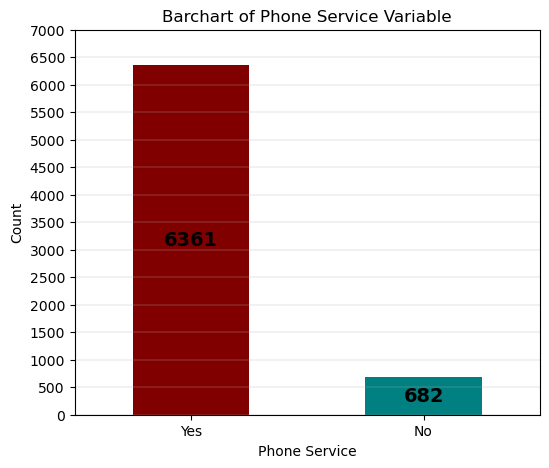

In [992]:
# Barchart for the 'PhoneService' categorical variable.
dfg = TCC_df['PhoneService'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Phone Service Variable', ylabel='Count', xlabel='Phone Service', color= ['maroon', 'teal'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,7001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

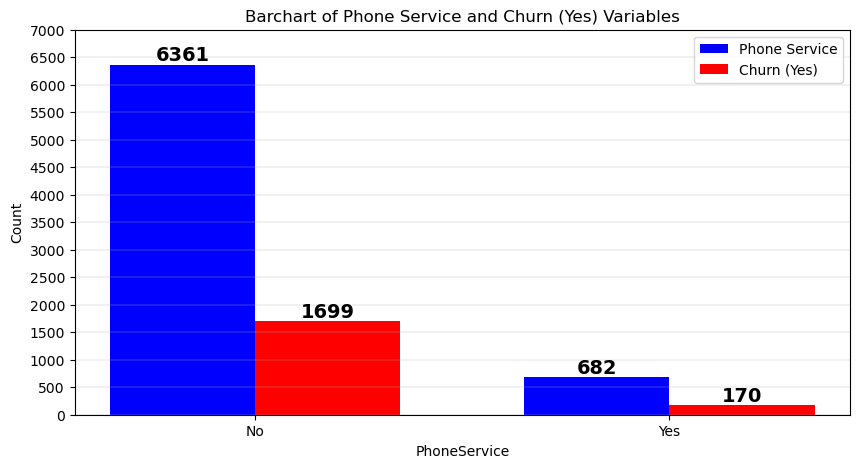

In [993]:
# Barchart for 'PhoneService' categorical variable with 'Churn' (Yes).
# Get counts for 'PhoneService'.
depend_counts = TCC_df['PhoneService'].value_counts()

# Get counts of 'Churn' (Yes) for each 'PhoneService' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['PhoneService'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'PhoneService' bars (blue).
ax.bar(x - width/2, depend_counts, width, label='Phone Service', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=14, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Phone Service and Churn (Yes) Variables')
ax.set_xlabel('PhoneService')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 7001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [994]:
# Evaluate the 'MultipleLines' categorical variable value counts.
TCC_df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

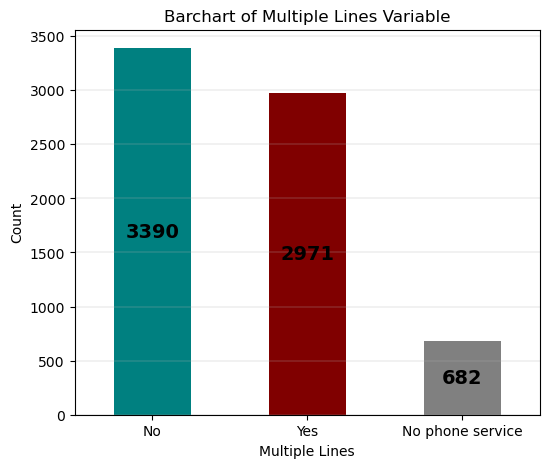

In [995]:
# Barchart for the 'MultipleLines' categorical variable.
dfg = TCC_df['MultipleLines'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Multiple Lines Variable', ylabel='Count', xlabel='Multiple Lines', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

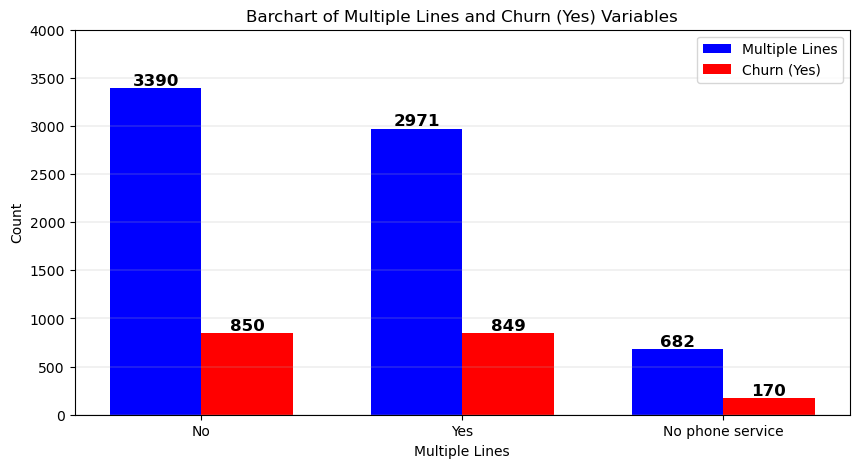

In [996]:
# Barchart for 'MultipleLines' categorical variable with Churn (Yes).
# Get counts for 'MultipleLines'.
mult_counts = TCC_df['MultipleLines'].value_counts()

# Get counts of 'Churn' (Yes) for each 'MultipleLines' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['MultipleLines'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No phone service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'MultipleLines' bars (blue).
ax.bar(x - width/2, mult_counts, width, label='Multiple Lines', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Multiple Lines and Churn (Yes) Variables')
ax.set_xlabel('Multiple Lines')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 4001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [997]:
# Evaluate the 'InternetService' categorical variable value counts.
TCC_df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

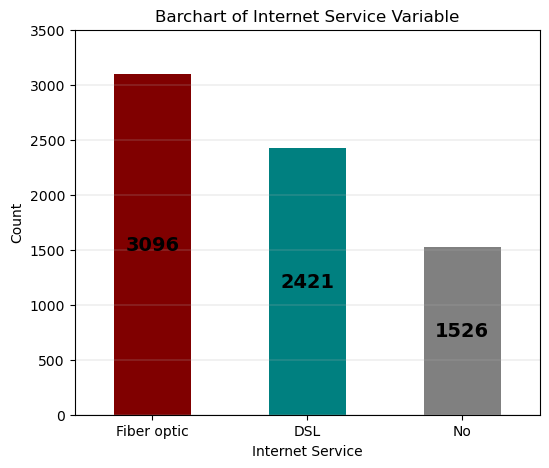

In [998]:
# Barchart for the 'InternetService' categorical variable.
dfg = TCC_df['InternetService'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Internet Service Variable', ylabel='Count', xlabel='Internet Service', color= ['maroon', 'teal', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

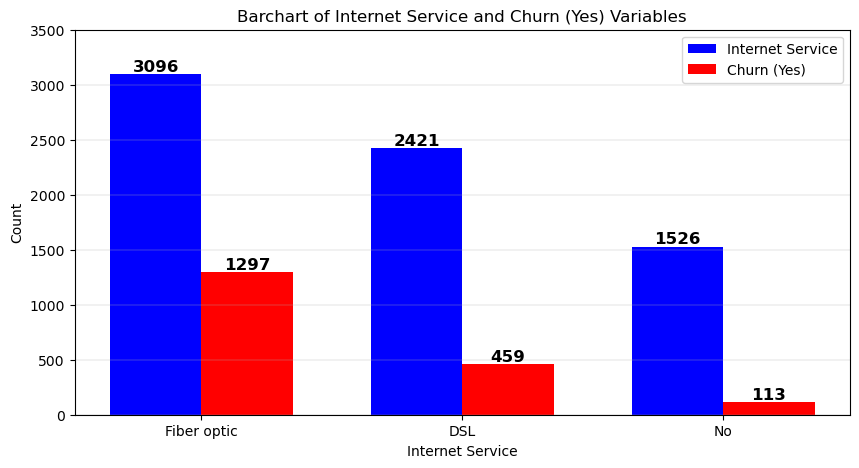

In [999]:
# Barchart for 'InternetService' categorical variable with Churn (Yes).
# Get counts for 'InternetService'.
internet_counts = TCC_df['InternetService'].value_counts()

# Get counts of 'Churn' (Yes) for each 'InternetService' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['InternetService'].value_counts()

# Set up the bar chart.
test_values = ['Fiber optic', 'DSL', 'No'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'MultipleLines' bars (blue).
ax.bar(x - width/2, internet_counts, width, label='Internet Service', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Internet Service and Churn (Yes) Variables')
ax.set_xlabel('Internet Service')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 3501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1000]:
# Evaluate the 'OnlineSecurity' categorical variable value counts.
TCC_df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

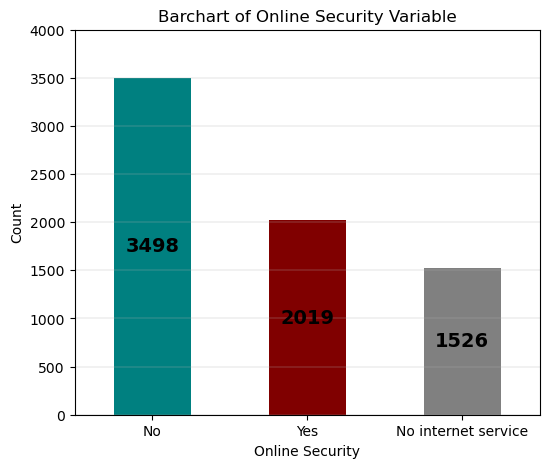

In [1001]:
# Barchart for the 'OnlineSecurity' categorical variable.
dfg = TCC_df['OnlineSecurity'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Online Security Variable', ylabel='Count', xlabel='Online Security', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,4001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

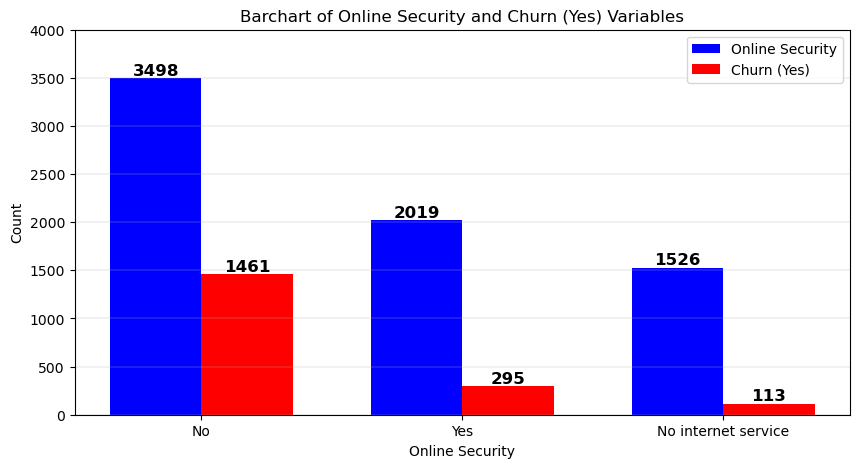

In [1002]:
# Barchart for 'OnlineSecurity' categorical variable with Churn (Yes).
# Get counts for 'OnlineSecurity'.
security_counts = TCC_df['OnlineSecurity'].value_counts()

# Get counts of 'Churn' (Yes) for each 'OnlineSecurity' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['OnlineSecurity'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No internet service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'OnlineSecurity' bars (blue).
ax.bar(x - width/2, security_counts, width, label='Online Security', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Online Security and Churn (Yes) Variables')
ax.set_xlabel('Online Security')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 4001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1003]:
# Evaluate the 'OnlineBackup' categorical variable value counts.
TCC_df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

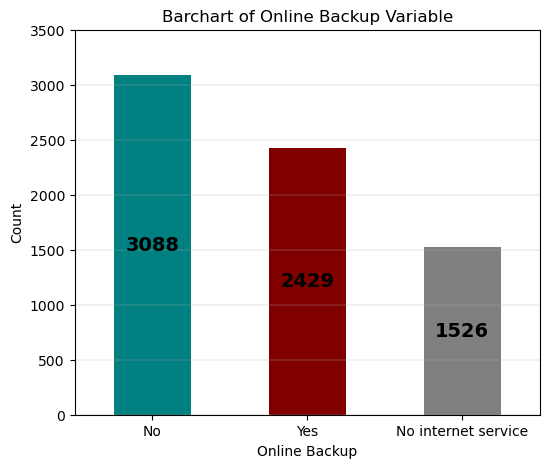

In [1004]:
# Barchart for the 'OnlineBackup' categorical variable.
dfg = TCC_df['OnlineBackup'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Online Backup Variable', ylabel='Count', xlabel='Online Backup', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

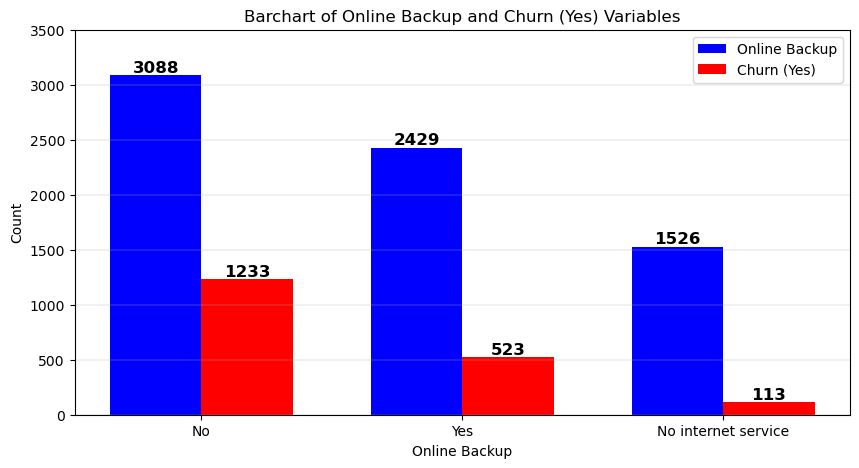

In [1005]:
# Barchart for 'OnlineBackup' categorical variable with Churn (Yes).
# Get counts for 'OnlineBackup'.
backup_counts = TCC_df['OnlineBackup'].value_counts()

# Get counts of 'Churn' (Yes) for each 'OnlineBackup' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['OnlineBackup'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No internet service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'OnlineBackup' bars (blue).
ax.bar(x - width/2, backup_counts, width, label='Online Backup', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Online Backup and Churn (Yes) Variables')
ax.set_xlabel('Online Backup')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 3501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1006]:
# Evaluate the 'DeviceProtection' categorical variable value counts.
TCC_df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

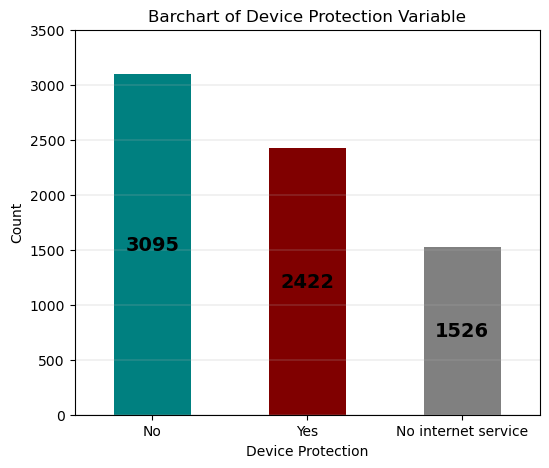

In [1007]:
# Barchart for the 'DeviceProtection' categorical variable.
dfg = TCC_df['DeviceProtection'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Device Protection Variable', ylabel='Count', xlabel='Device Protection', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

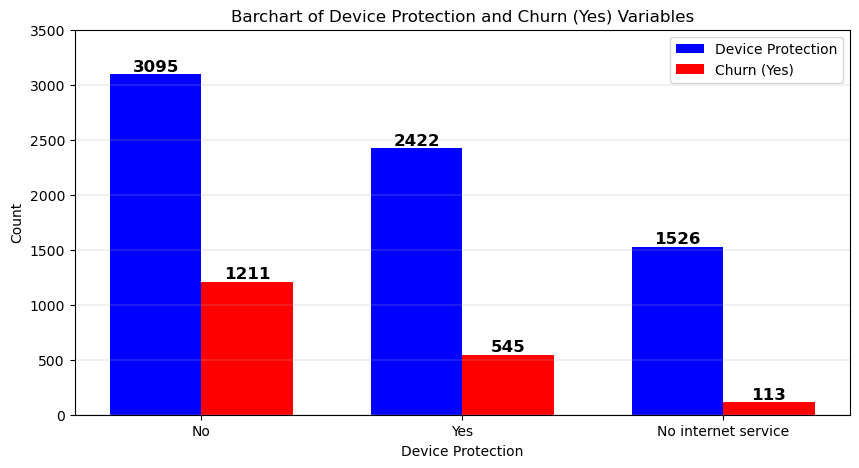

In [1008]:
# Barchart for 'DeviceProtection' categorical variable with Churn (Yes).
# Get counts for 'DeviceProtection'.
device_counts = TCC_df['DeviceProtection'].value_counts()

# Get counts of 'Churn' (Yes) for each 'DeviceProtection' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['DeviceProtection'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No internet service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'DeviceProtection' bars (blue).
ax.bar(x - width/2, device_counts, width, label='Device Protection', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Device Protection and Churn (Yes) Variables')
ax.set_xlabel('Device Protection')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 3501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1009]:
# Evaluate the 'TechSupport' categorical variable value counts.
TCC_df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

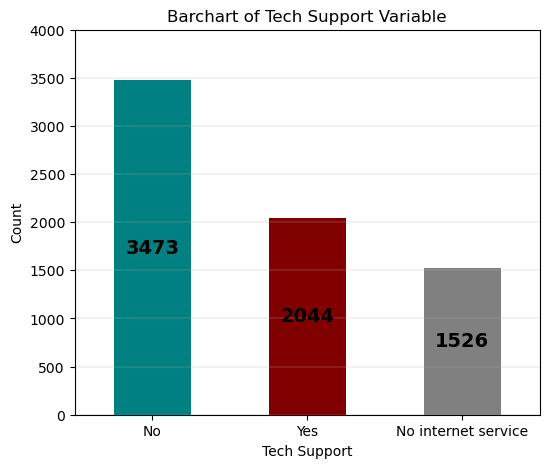

In [1010]:
# Barchart for the 'TechSupport' categorical variable.
dfg = TCC_df['TechSupport'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Tech Support Variable', ylabel='Count', xlabel='Tech Support', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,4001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

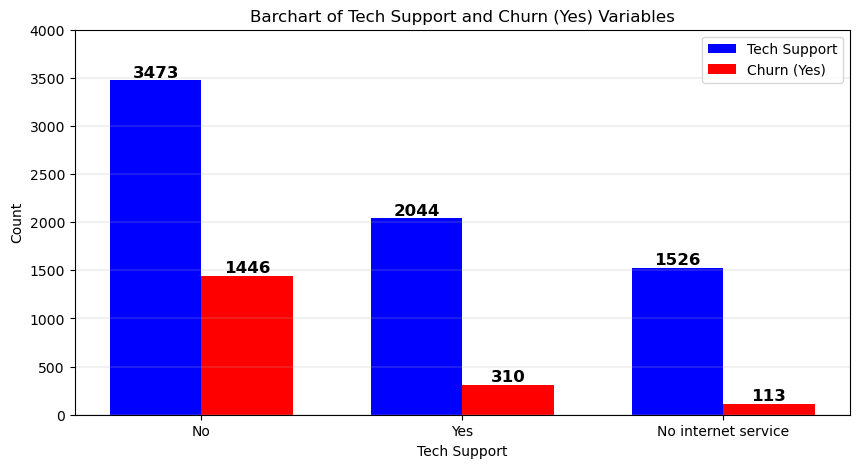

In [1011]:
# Barchart for 'TechSupport' categorical variable with Churn (Yes).
# Get counts for 'TechSupport'.
tech_counts = TCC_df['TechSupport'].value_counts()

# Get counts of 'Churn' (Yes) for each 'TechSupport' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['TechSupport'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No internet service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'TechSupport' bars (blue).
ax.bar(x - width/2, tech_counts, width, label='Tech Support', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Tech Support and Churn (Yes) Variables')
ax.set_xlabel('Tech Support')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 4001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1012]:
# Evaluate the 'StreamingTV' categorical variable value counts.
TCC_df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

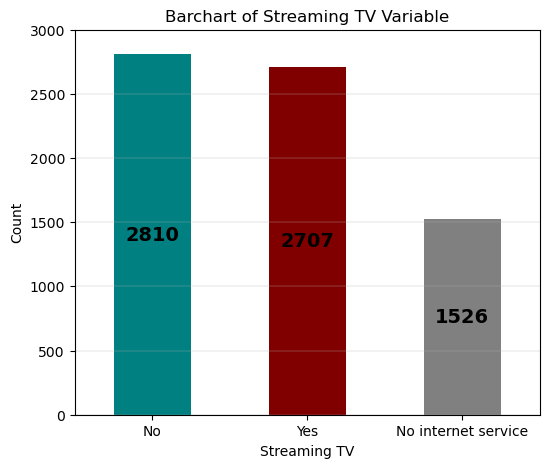

In [1013]:
# Barchart for the 'StreamingTV' categorical variable.
dfg = TCC_df['StreamingTV'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Streaming TV Variable', ylabel='Count', xlabel='Streaming TV', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

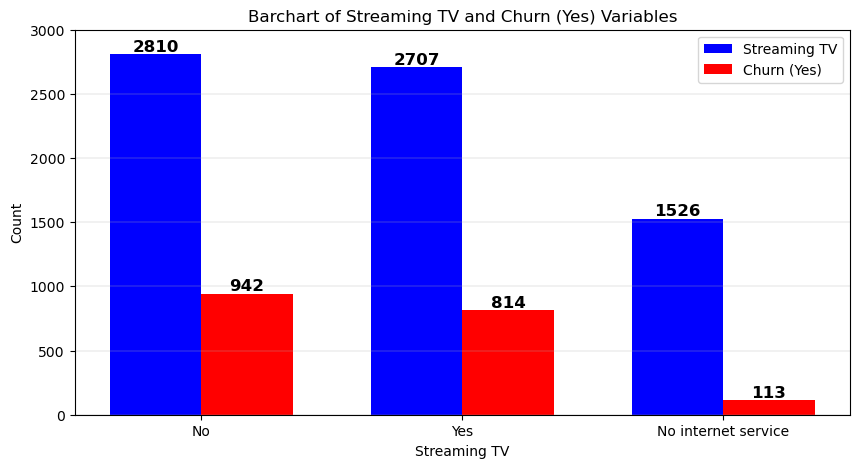

In [1014]:
# Barchart for 'StreamingTV' categorical variable with Churn (Yes).
# Get counts for 'StreamingTV'.
tv_counts = TCC_df['StreamingTV'].value_counts()

# Get counts of 'Churn' (Yes) for each 'StreamingTV' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['StreamingTV'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No internet service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'StreamingTV' bars (blue).
ax.bar(x - width/2, tv_counts, width, label='Streaming TV', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Streaming TV and Churn (Yes) Variables')
ax.set_xlabel('Streaming TV')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 3001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1015]:
# Evaluate the 'StreamingMovies' categorical variable value counts.
TCC_df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

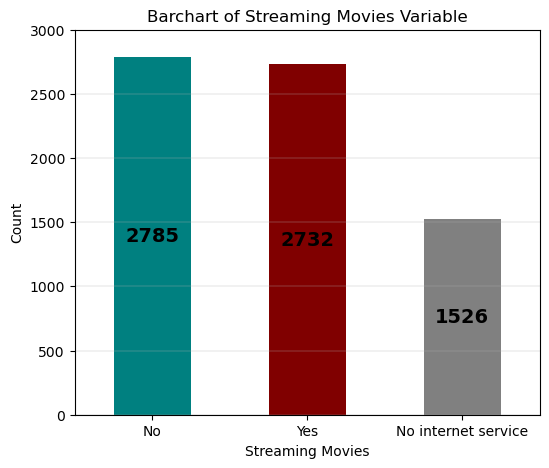

In [1016]:
# Barchart for the 'StreamingMovies' categorical variable.
dfg = TCC_df['StreamingMovies'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Streaming Movies Variable', ylabel='Count', xlabel='Streaming Movies', color= ['teal', 'maroon', 'grey'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,3001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

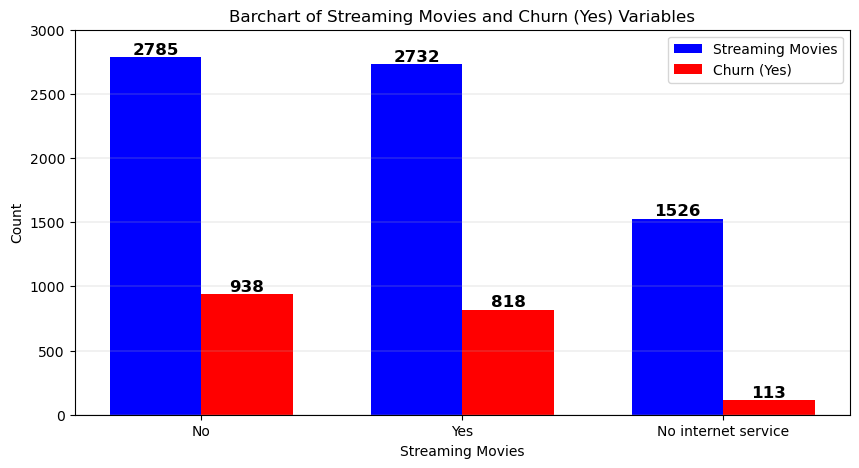

In [1017]:
# Barchart for 'StreamingMovies' categorical variable with Churn (Yes).
# Get counts for 'StreamingMovies'.
movies_counts = TCC_df['StreamingMovies'].value_counts()

# Get counts of 'Churn' (Yes) for each 'StreamingMovies' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['StreamingMovies'].value_counts()

# Set up the bar chart.
test_values = ['No', 'Yes', 'No internet service'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'StreamingMovies' bars (blue).
ax.bar(x - width/2, movies_counts, width, label='Streaming Movies', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Streaming Movies and Churn (Yes) Variables')
ax.set_xlabel('Streaming Movies')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 3001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1018]:
# Evaluate the 'Contract' categorical variable value counts.
TCC_df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

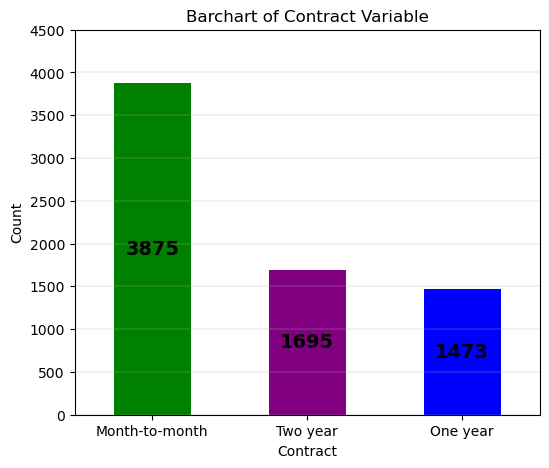

In [1019]:
# Barchart for the 'Contract' categorical variable.
dfg = TCC_df['Contract'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Contract Variable', ylabel='Count', xlabel='Contract', color= ['green', 'purple', 'blue'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,4501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

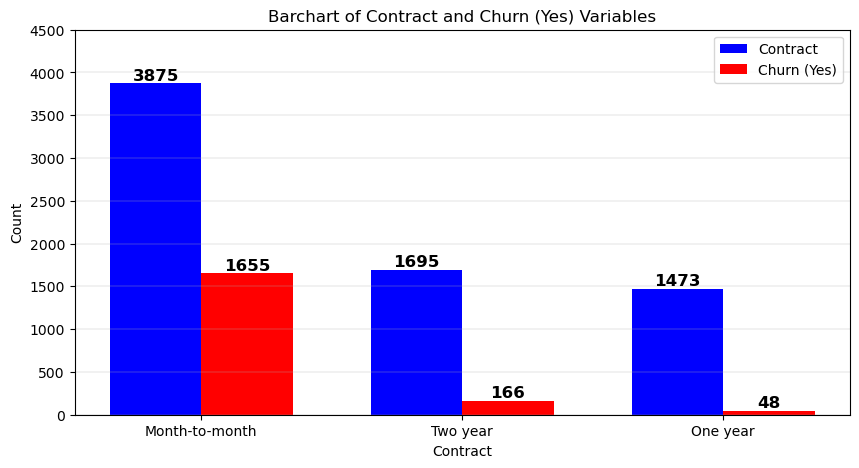

In [1020]:
# Barchart for 'Contract' categorical variable with Churn (Yes).
# Get counts for 'Contract'.
contract_counts = TCC_df['Contract'].value_counts()

# Get counts of 'Churn' (Yes) for each 'Contract' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['Contract'].value_counts()

# Set up the bar chart.
test_values = ['Month-to-month', 'Two year', 'One year'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'Contract' bars (blue).
ax.bar(x - width/2, contract_counts, width, label='Contract', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Contract and Churn (Yes) Variables')
ax.set_xlabel('Contract')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 4501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1021]:
# Evaluate the 'PaperlessBilling' categorical variable value counts.
TCC_df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

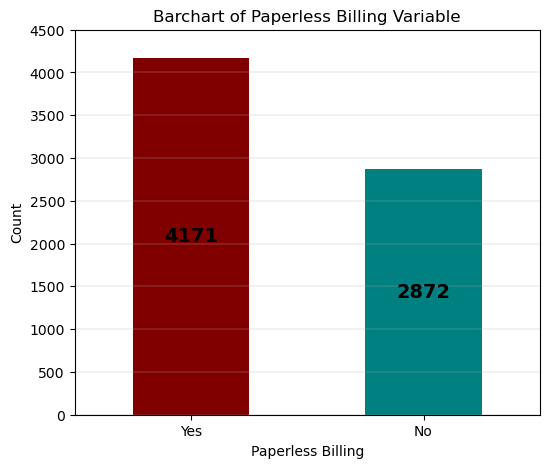

In [1022]:
# Barchart for the 'PaperlessBilling' categorical variable.
dfg = TCC_df['PaperlessBilling'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Paperless Billing Variable', ylabel='Count', xlabel='Paperless Billing', color= ['maroon', 'teal'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,4501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

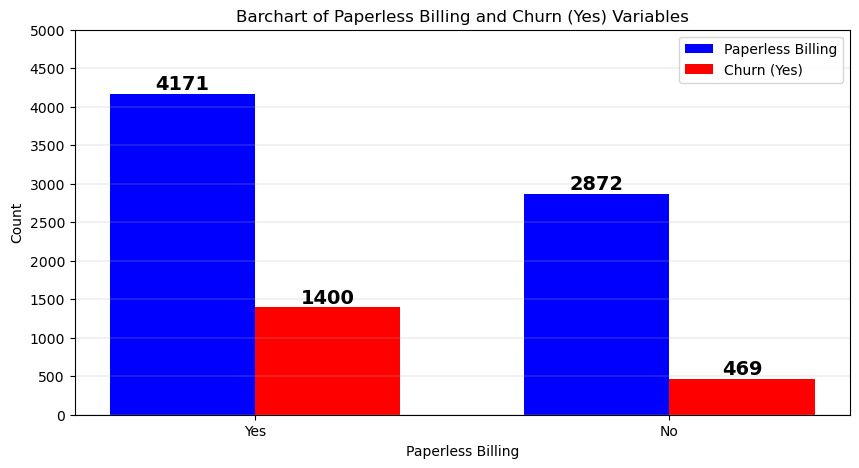

In [1023]:
# Barchart for 'PaperlessBilling' categorical variable with 'Churn' (Yes).
# Get counts for 'PaperlessBilling'.
depend_counts = TCC_df['PaperlessBilling'].value_counts()

# Get counts of 'Churn' (Yes) for each 'PaperlessBilling' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()

# Set up the bar chart.
test_values = ['Yes', 'No'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'PaperlessBilling' bars (blue).
ax.bar(x - width/2, depend_counts, width, label='Paperless Billing', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=14, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Paperless Billing and Churn (Yes) Variables')
ax.set_xlabel('Paperless Billing')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 5001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [1024]:
# Evaluate the 'PaymentMethod' categorical variable value counts.
TCC_df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

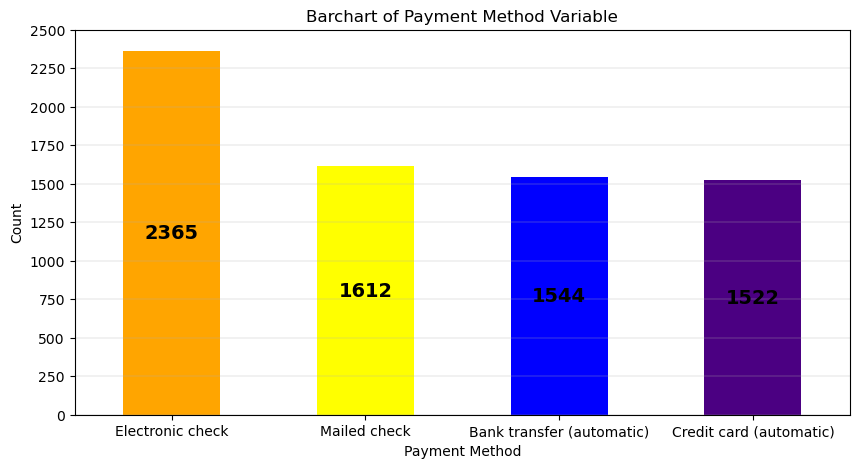

In [1025]:
# Barchart for the 'PaymentMethod' categorical variable.
dfg = TCC_df['PaymentMethod'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Payment Method Variable', ylabel='Count', xlabel='Payment Method', color= ['orange', 'yellow', 'blue', 'indigo'], rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,2501,step=250))
plt.grid(axis='y', linewidth=0.25)
plt.show()

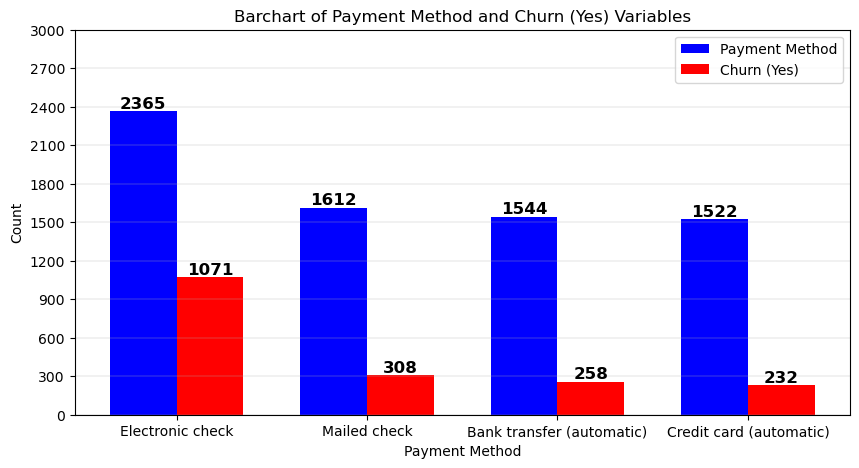

In [1026]:
# Barchart for 'PaymentMethod' categorical variable with Churn (Yes).
# Get counts for 'PaymentMethod'.
contract_counts = TCC_df['PaymentMethod'].value_counts()

# Get counts of 'Churn' (Yes) for each 'PaymentMethod' value.
class_Yes = TCC_df[TCC_df['Churn'] == 'Yes']['PaymentMethod'].value_counts()

# Set up the bar chart.
test_values = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'PaymentMethod' bars (blue).
ax.bar(x - width/2, contract_counts, width, label='Payment Method', color='blue')
# Plot 'Churn' (Yes) bars (red).
ax.bar(x + width/2, class_Yes, width, label='Churn (Yes)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Payment Method and Churn (Yes) Variables')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 3001, step=300))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

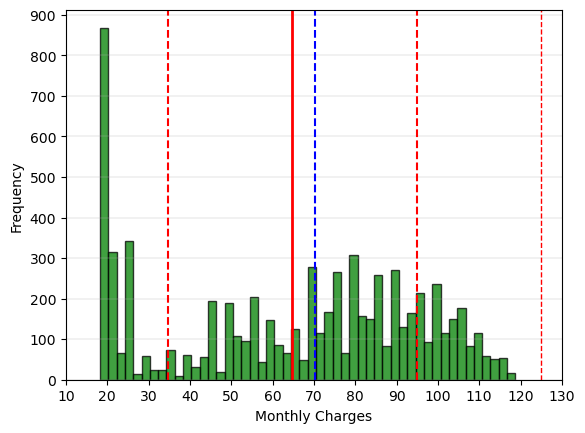

In [1027]:
# Histogram for the 'MonthlyCharges' continuous variable.
plt.hist(TCC_df['MonthlyCharges'], bins = 50, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.xlim(10, 130)
plt.xticks(np.arange(10,131,step=10))
plt.yticks(np.arange(0,901,step=100))

mean_value = TCC_df['MonthlyCharges'].mean()
median_value = TCC_df['MonthlyCharges'].median()
std_value = TCC_df['MonthlyCharges'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

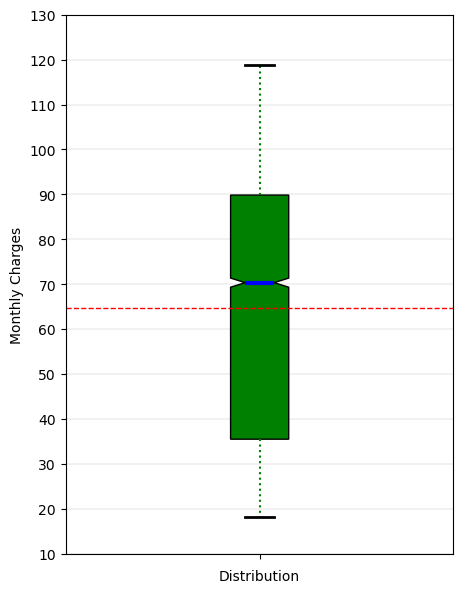

In [1028]:
# Boxplot for the 'MonthlyCharges' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(TCC_df['MonthlyCharges'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Monthly Charges')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(10,131,step=10)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [1029]:
# 'MonthlyCharges' Anderson-Darling Normality Test
result = anderson(TCC_df['MonthlyCharges'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 170.555
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


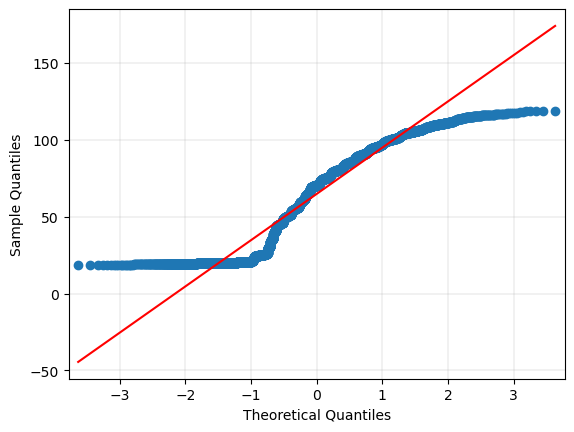

In [1030]:
# 'MonthlyCharges' QQ plot
qqplot(TCC_df['MonthlyCharges'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [1031]:
# 'MonthlyCharges' Skewness & Kurtosis
print(f'Skewness: {skew(TCC_df['MonthlyCharges']).round(3)}')
print(f'Kurtosis: {kurtosis(TCC_df['MonthlyCharges']).round(3)}')

Skewness: -0.22
Kurtosis: -1.257


In [1032]:
# Pre-imputation and conversion steps required for the 'TotalCharges' variable.
# Step 1: Replace blanks with NaN
TCC_df['TotalCharges'] = TCC_df['TotalCharges'].replace(" ", np.nan)

# Step 2: Convert to numeric (now safe to do since blanks are NaN)
TCC_df['TotalCharges'] = pd.to_numeric(TCC_df['TotalCharges'])

# Step 3: Identify new customers (tenure == 0) and where TotalCharges is NaN.
mask = (TCC_df['tenure'] == 0) & (TCC_df['TotalCharges'].isna())

# Step 4: Fill in TotalCharges = MonthlyCharges for these new customers.
TCC_df.loc[mask, 'TotalCharges'] = TCC_df.loc[mask, 'MonthlyCharges']

# Step 5: Generate descriptive statistics for further EDA
TCC_df['TotalCharges'].describe().map('{:,.3f}'.format)

count    7,043.000
mean     2,279.799
std      2,266.730
min         18.800
25%        398.550
50%      1,394.550
75%      3,786.600
max      8,684.800
Name: TotalCharges, dtype: object

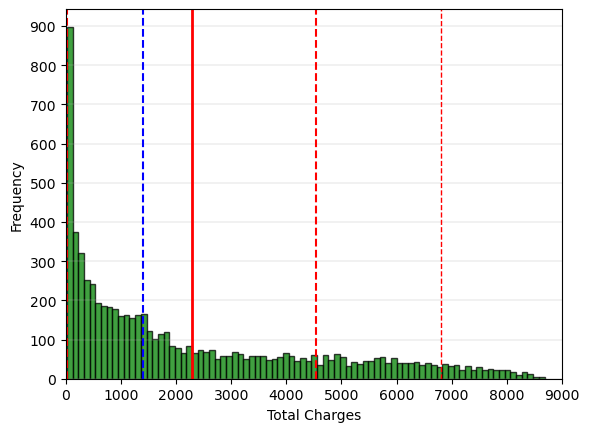

In [1033]:
# Histogram for the 'TotalCharges' continuous variable.
plt.hist(TCC_df['TotalCharges'], bins = 84, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.xlim(0, 9000)
plt.xticks(np.arange(0,9001,step=1000))
plt.yticks(np.arange(0,901,step=100))

mean_value = TCC_df['TotalCharges'].mean()
median_value = TCC_df['TotalCharges'].median()
std_value = TCC_df['TotalCharges'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()


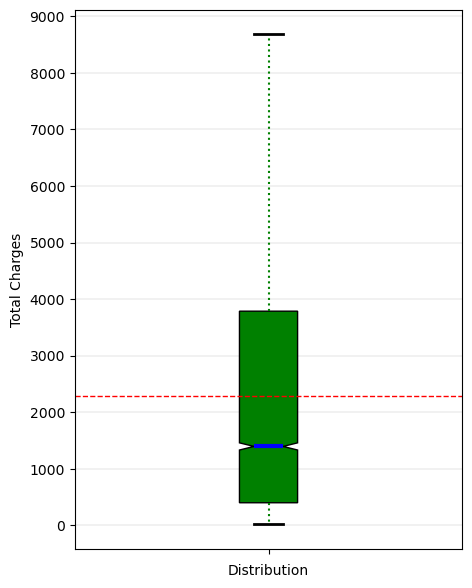

In [1034]:
# Boxplot for the 'TotalCharges' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(TCC_df['TotalCharges'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Total Charges')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,9001,step=1000)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [1035]:
# 'TotalCharges' Anderson-Darling Normality Test
result = anderson(TCC_df['TotalCharges'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 346.771
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


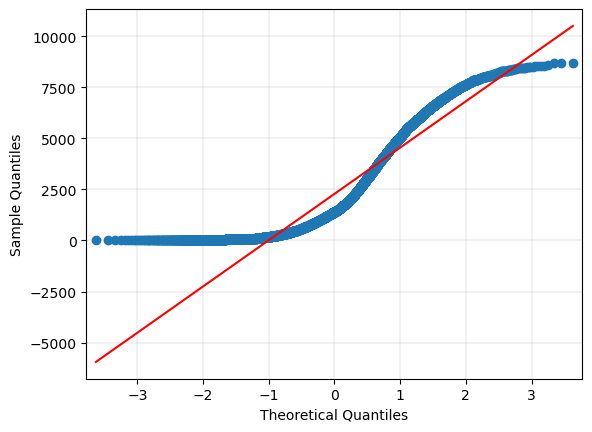

In [1036]:
# 'TotalCharges' QQ plot
qqplot(TCC_df['TotalCharges'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [1037]:
# 'TotalCharges' Skewness & Kurtosis
print(f'Skewness: {skew(TCC_df['TotalCharges']).round(3)}')
print(f'Kurtosis: {kurtosis(TCC_df['TotalCharges']).round(3)}')

Skewness: 0.963
Kurtosis: -0.229


Perform Necessary Feature Encoding, Removal, Creation, and Scaling.

In [1038]:
# Necessary Feature Encoding
# Binary encoding for binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    TCC_df[col] = le.fit_transform(TCC_df[col])  # Female: 0, Male: 1; No: 0, Yes: 1

# One-hot encoding for multi-category variables
one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaymentMethod']
TCC_df = pd.get_dummies(TCC_df, columns=one_hot_cols, drop_first=False)

# Display first few rows to verify encoding
TCC_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False


In [1039]:
# Redundant Feature Removal
# Identify redundant one-hot encoded columns.
redundant_cols = [col for col in TCC_df.columns if 'No phone service' in col or 'No internet service' in col]

# Print columns to be removed for verification
print("Columns to be removed:", redundant_cols)

# Drop redundant columns.
TCC_df = TCC_df.drop(redundant_cols, axis=1)

# Drop customerID (no predictive value, high cardinality).
TCC_df = TCC_df.drop('customerID', axis=1)

# Display first few rows to verify
TCC_df.head()

Columns to be removed: ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,False,True,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False


Correlations with Churn (sorted by absolute value):
Churn                                      1.000000
charge_per_month                           0.411756
Contract_Month-to-month                    0.405103
tenure                                    -0.352229
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
tenure_short                               0.310904
InternetService_Fiber optic                0.308020
Contract_Two year                         -0.302253
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
tenure_long                               -0.245136
InternetService_No                        -0.227890
TotalCharges                              -0.198347
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                         -0.177820
OnlineSecuri

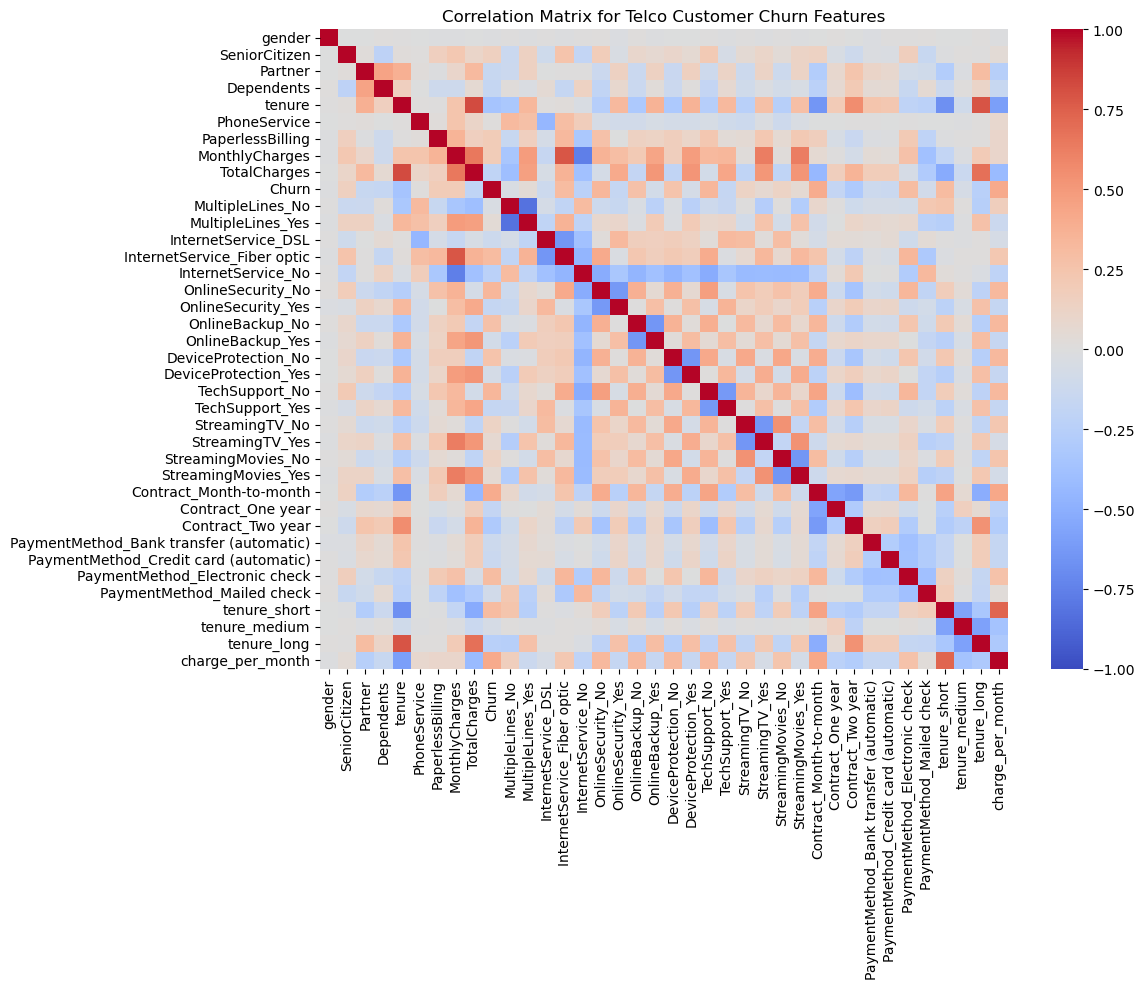

Correlation with Churn:
Churn                                      1.000000
charge_per_month                           0.411756
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
tenure_short                               0.310904
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                            

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_short,tenure_medium,tenure_long,charge_per_month
0,0,0,1,0,1,0,1,29.85,29.85,0,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,14.925000
1,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,1.627143
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True,True,False,False,17.950000
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,False,True,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,False,False,False,True,False,0.919565
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,23.566667


In [1040]:
# 1. Tenure Bins: Custom cutoffs (Based on Boxplot: 0-8, 8-55, 56+ months)
TCC_df['tenure_bin'] = pd.cut(TCC_df['tenure'], bins=[-float('inf'), 8, 55, float('inf')], labels=['short', 'medium', 'long'])
TCC_df = pd.get_dummies(TCC_df, columns=['tenure_bin'], prefix='tenure', drop_first=False)

# 2. Charge-to-Tenure Ratio: charge_per_month
TCC_df['charge_per_month'] = TCC_df['MonthlyCharges'] / (TCC_df['tenure'] + 1)

# Compute correlation matrix
correlation_matrix = TCC_df.corr()

# Focus on correlations with Churn, sorted by absolute value
churn_correlations = correlation_matrix['Churn'].sort_values(key=abs, ascending=False)
print("Correlations with Churn (sorted by absolute value):")
print(churn_correlations)

# Create Series and sort by absolute value
correlation_df = pd.Series(churn_correlations, name='Correlation').sort_values(key=abs, ascending=False)

# Convert to DataFrame for table rendering
table_df= pd.DataFrame(correlation_df, columns=['Correlation']).round(4)

# Plot Correlation with Churn (sorted by absolute value) Table
plt.figure(figsize=(6, 12))
plt.table(cellText=table_df.values,
          colLabels=table_df.columns,
          rowLabels=table_df.index,
          cellLoc='center', loc='center')
plt.axis('off')
plt.title('Correlations with Churn (sorted by absolute value)')
plt.tight_layout()
plt.savefig('tables/Correlations with Churn.png', dpi=300, bbox_inches='tight')
plt.close()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Telco Customer Churn Features')
plt.tight_layout()
plt.savefig('plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation analysis with Churn
print("Correlation with Churn:")
correlation = TCC_df.corr()['Churn'].sort_values(ascending=False)
print(correlation)

# Display new columns and dataset shape
new_cols = ['tenure_short', 'tenure_medium', 'tenure_long', 'charge_per_month']
print("\nNew features added:", new_cols)
print("Dataset shape after feature creation:", TCC_df.shape)

# Display first few rows to verify
print("\nFirst few rows with new features:")
TCC_df.head()

Feature Importances vs. Correlations (All Features):
                                         Importance  Correlation
charge_per_month                           0.166302     0.411756
TotalCharges                               0.128069    -0.198347
MonthlyCharges                             0.122087     0.193356
tenure                                     0.095340    -0.352229
Contract_Month-to-month                    0.046540     0.405103
OnlineSecurity_No                          0.030922     0.342637
TechSupport_No                             0.026576     0.337281
PaymentMethod_Electronic check             0.026421     0.301919
InternetService_Fiber optic                0.024062     0.308020
gender                                     0.023682    -0.008612
PaperlessBilling                           0.022291     0.191825
Partner                                    0.019984    -0.150448
tenure_short                               0.018738     0.310904
SeniorCitizen                        

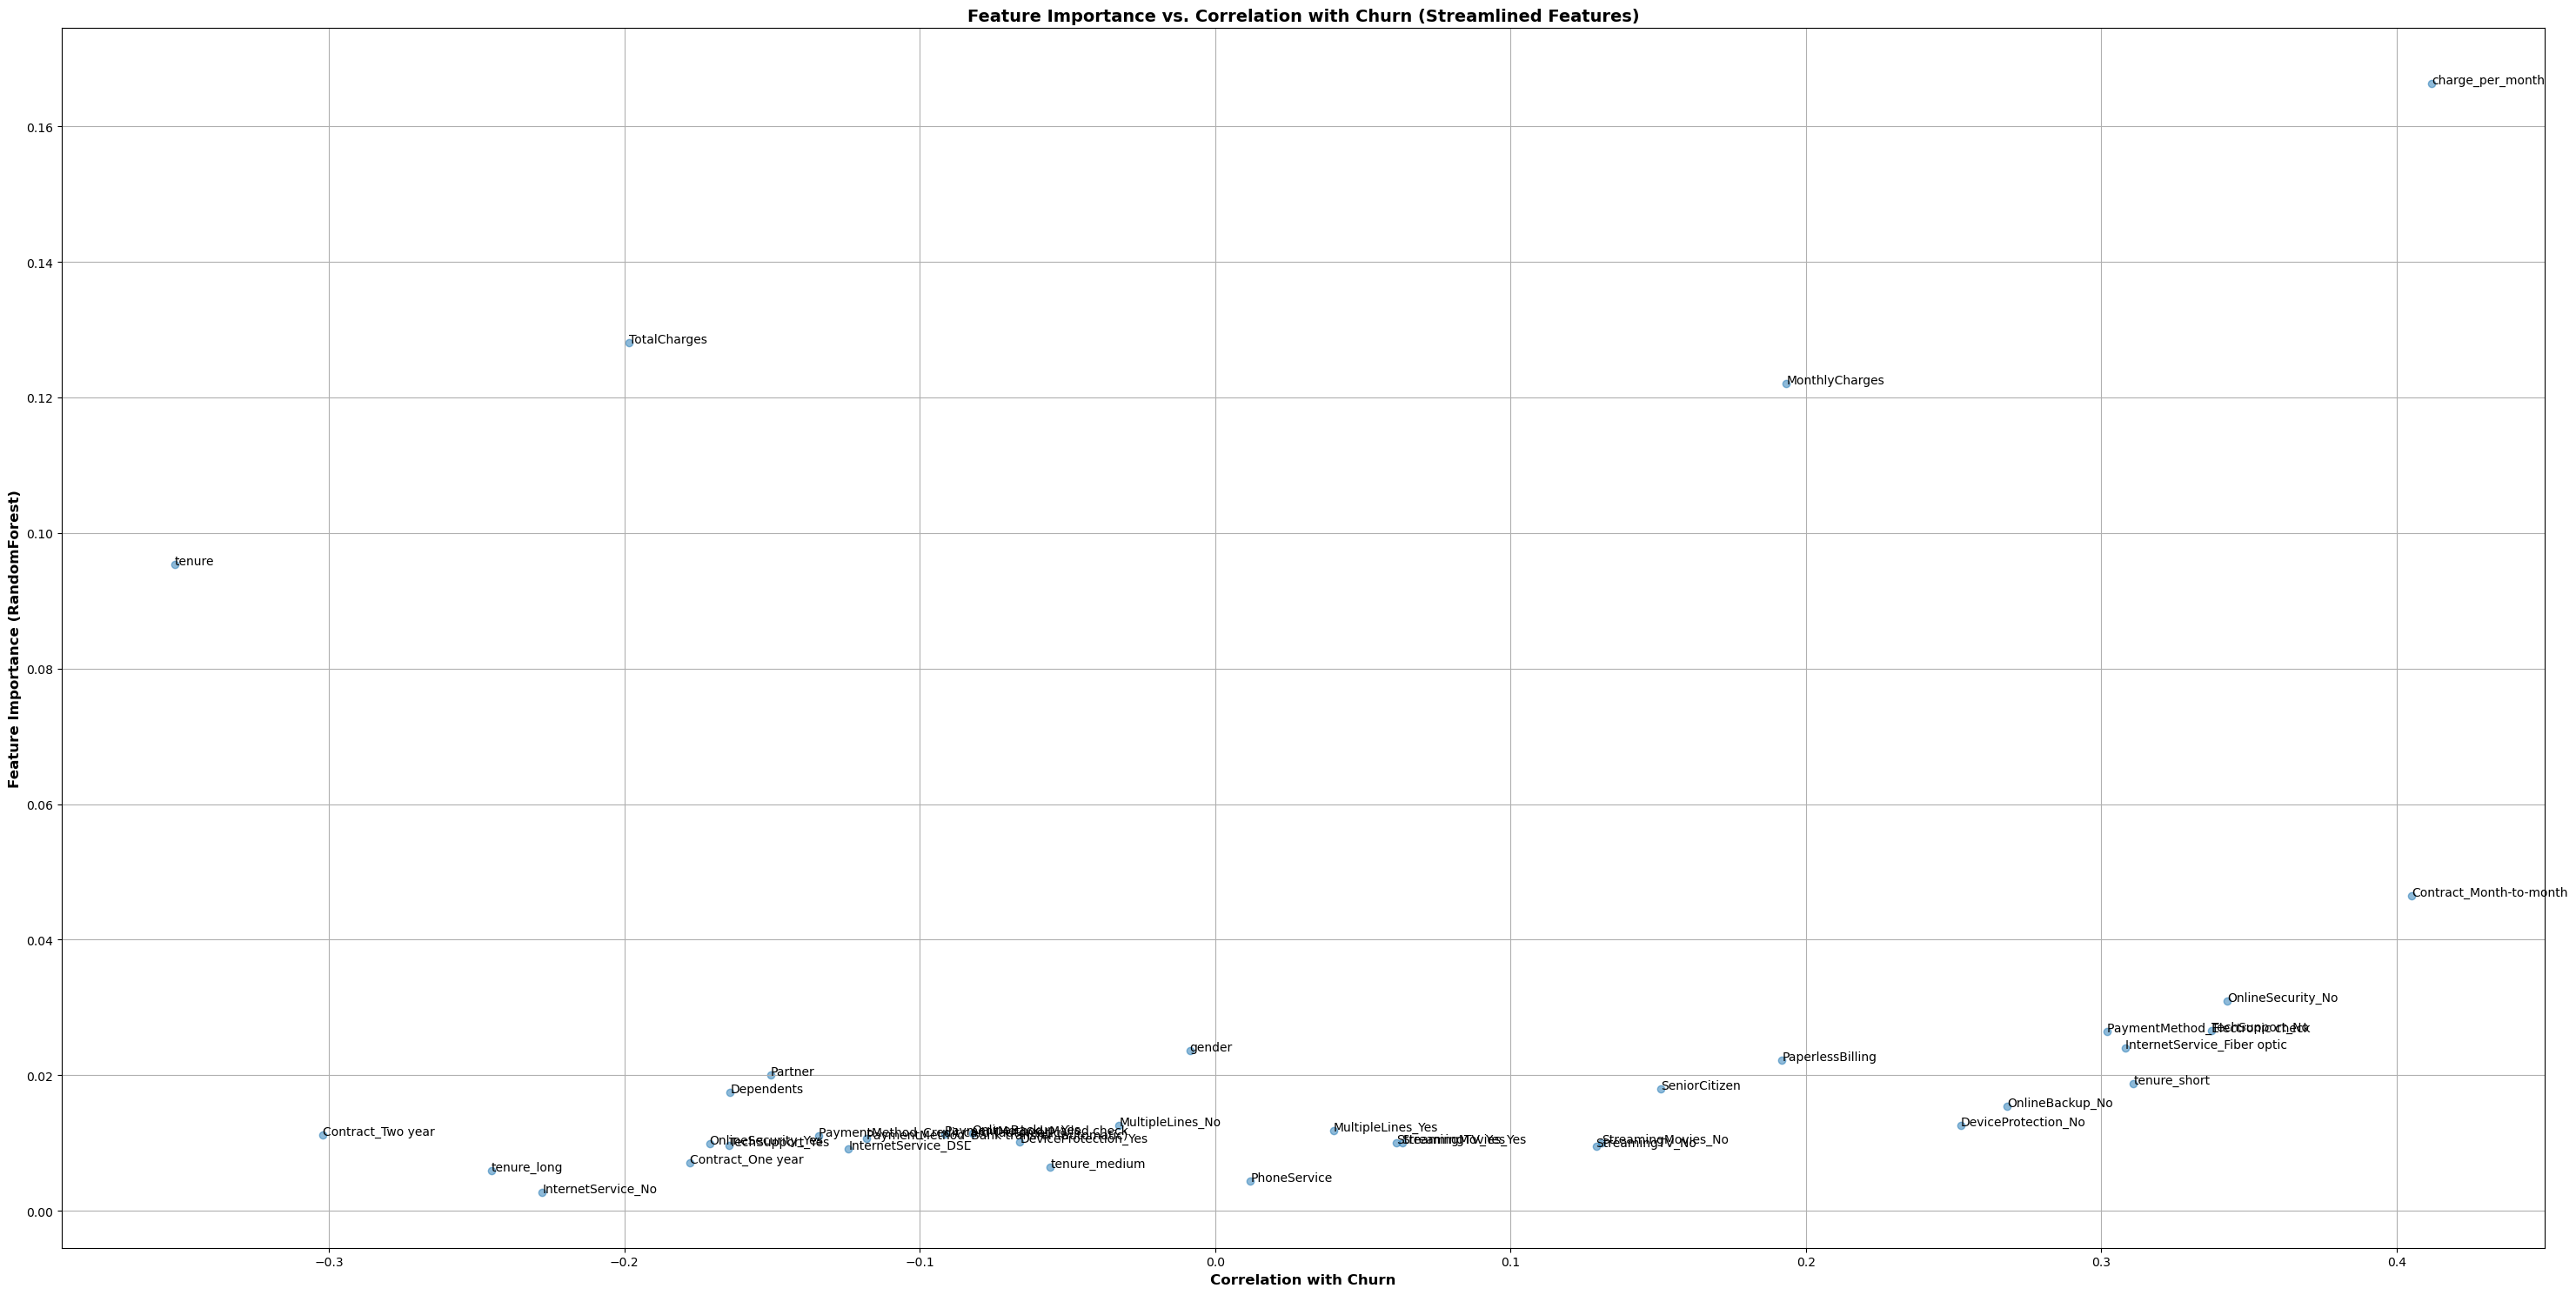

In [1041]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Provided correlations with Churn
correlations = {
    'Churn': 1.000000,
    'charge_per_month': 0.411756,
    'Contract_Month-to-month': 0.405103,
    'tenure': -0.352229,
    'OnlineSecurity_No': 0.342637,
    'TechSupport_No': 0.337281,
    'tenure_short': 0.310904,
    'InternetService_Fiber optic': 0.308020,
    'Contract_Two year': -0.302253,
    'PaymentMethod_Electronic check': 0.301919,
    'OnlineBackup_No': 0.268005,
    'DeviceProtection_No': 0.252481,
    'tenure_long': -0.245136,
    'InternetService_No': -0.227890,
    'TotalCharges': -0.198347,
    'MonthlyCharges': 0.193356,
    'PaperlessBilling': 0.191825,
    'Contract_One year': -0.177820,
    'OnlineSecurity_Yes': -0.171226,
    'TechSupport_Yes': -0.164674,
    'Dependents': -0.164221,
    'SeniorCitizen': 0.150889,
    'Partner': -0.150448,
    'PaymentMethod_Credit card (automatic)': -0.134302,
    'StreamingMovies_No': 0.130845,
    'StreamingTV_No': 0.128916,
    'InternetService_DSL': -0.124214,
    'PaymentMethod_Bank transfer (automatic)': -0.117937,
    'PaymentMethod_Mailed check': -0.091683,
    'OnlineBackup_Yes': -0.082255,
    'DeviceProtection_Yes': -0.066160,
    'StreamingTV_Yes': 0.063228,
    'StreamingMovies_Yes': 0.061382,
    'tenure_medium': -0.055866,
    'MultipleLines_Yes': 0.040102,
    'MultipleLines_No': -0.032569,
    'PhoneService': 0.011942,
    'gender': -0.008612
}

# Prepare data for RandomForest
X = TCC_df.drop('Churn', axis=1)
y = TCC_df['Churn']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Create comparison DataFrame
importance_df = pd.Series(rf.feature_importances_, index=X.columns, name='Importance')
correlation_df = pd.Series(correlations, name='Correlation').drop('Churn')  # Exclude Churn
comparison_df = pd.DataFrame({'Importance': importance_df, 'Correlation': correlation_df}).sort_values(by='Importance', ascending=False)

# Display results for all features
print("Feature Importances vs. Correlations (All Features):")
print(comparison_df.head(37))

# Plot Importance vs. Correlation Table
plt.figure(figsize=(8, 12))
plt.table(cellText=comparison_df.values.round(3),
          colLabels=comparison_df.columns,
          rowLabels=comparison_df.index,
          cellLoc='center', loc='center')
plt.axis('off')
plt.title('Feature Importances vs. Correlations (All Features)')
plt.tight_layout()
plt.savefig('tables/importance_vs_correlation.png', dpi=300, bbox_inches='tight')
plt.close()

# Plot Importance vs. Correlation Scatter
plt.figure(figsize=(30, 15))
plt.scatter(comparison_df['Correlation'], comparison_df['Importance'], alpha=0.5)
for i, feature in enumerate(comparison_df.index[:37]):  # Label top 10
    plt.text(comparison_df['Correlation'].iloc[i], comparison_df['Importance'].iloc[i], feature, fontsize=10)
plt.xlabel('Correlation with Churn', fontsize=12, fontweight='bold')
plt.ylabel('Feature Importance (RandomForest)', fontsize=12, fontweight='bold')
plt.title('Feature Importance vs. Correlation with Churn (Streamlined Features)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/importance_vs_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [1043]:
# Export prepared .csv file for modeling use.
# Verify dataset shape and columns
print("Dataset shape:", TCC_df.shape)
print("\nColumns in dataset:", TCC_df.columns.tolist())

# Verify sample of data
print("\nFirst 5 rows of prepared dataset:")
print(TCC_df.head())

# Export to CSV
output_path = 'Telco-Customer-Churn-prepared.csv'
TCC_df.to_csv(output_path, index=False)
print(f"\nPrepared dataset saved as '{output_path}'")

Dataset shape: (7043, 38)

Columns in dataset: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_short', 'tenure_medium', 'tenure_long', 'charge_per_month']

First 5 rows of prepared dataset:
   gender  SeniorCitizen  Partner  ...  tenure_medium  tenure_long  charge_per_month
0       0              0        1  ...   